# Setup

In [6]:
print("The kernel is running!")

The kernel is running!


In [230]:
# from helpers.term_paths import TERM_PATHS
import helpers.project_config as tp # renamed

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [8]:
print(tp.TERM_SIZES)

[153, 147, 181, 200]


To make sure the import work make sure you run your notebook from the right folder (Code Vx)

In [9]:
Path.cwd()

WindowsPath('C:/Bibliothek/Career/UZH/BA BT Bachelor Arbeit Thesis/Code V3')

# Dev 1

## Broad Overview of datasets

In [217]:
filename = "aggregated_metrics_v4_061025.csv"
filename = "commit_stats_all_terms_031125.csv"
filename = "cleaned_aggregated_metrics_v4_061025.csv"
dataset_path = tp.base_path + "output/" + filename
dataset_path

'C:/Bibliothek/Career/UZH/BA BT Bachelor Arbeit Thesis/Code V3/output/cleaned_aggregated_metrics_v4_061025.csv'

In [218]:
df = pd.read_csv(dataset_path)
df.shape

(672, 103)

In [224]:
df['3 Folders total_lines'].describe()

count      672.000000
mean      4146.991071
std       3668.156063
min        347.000000
25%       2988.500000
50%       3678.500000
75%       4724.000000
max      88614.000000
Name: 3 Folders total_lines, dtype: float64

In [223]:
df.columns.tolist()

['project index',
 'folder count',
 'file count',
 'file count tslike',
 'file count .ts',
 'file count .tsx',
 'file count .js',
 'file count .jsx',
 'commit count',
 'unique commit authors',
 'commit count per author',
 'first commit date',
 'last commit date',
 'lines of code',
 'lines of code tslike',
 'lines of code .ts',
 'lines of code .tsx',
 'lines of code .js',
 'lines of code .jsx',
 'lines of comments',
 'lines of comments tslike',
 'lines of comments .ts',
 'lines of comments .tsx',
 'lines of comments .js',
 'lines of comments .jsx',
 '/frontend .ts file_count',
 '/frontend .ts total_lines',
 '/frontend .ts sloc',
 '/frontend .ts total_lines_of_comments',
 '/frontend .ts blank_lines',
 '/frontend .js file_count',
 '/frontend .js total_lines',
 '/frontend .js sloc',
 '/frontend .js total_lines_of_comments',
 '/frontend .js blank_lines',
 '/src .ts file_count',
 '/src .ts total_lines',
 '/src .ts sloc',
 '/src .ts total_lines_of_comments',
 '/src .ts blank_lines',
 '/src .j

## Deeper Exploration

In [14]:
df.dtypes

GenAI Period           bool
Term                  int64
Project               int64
Author Name          object
Author Email         object
Date                 object
Repository           object
Insertions            int64
Deletions             int64
Total Lines           int64
Files Changed         int64
Diff Lines            int64
File Count            int64
Unit Size (DMM)     float64
Complexity (DMM)    float64
Interface (DMM)     float64
Commit Hash          object
Merge Commit           bool
Default Branch         bool
dtype: object

In [15]:
df['Project']

0          0
1          0
2          0
3          0
4          0
        ... 
86478    680
86479    680
86480    680
86481    680
86482    680
Name: Project, Length: 86483, dtype: int64

In [16]:
df['Repository']

0        project_team037
1        project_team037
2        project_team037
3        project_team037
4        project_team037
              ...       
86478    project_team230
86479    project_team230
86480    project_team230
86481    project_team230
86482    project_team230
Name: Repository, Length: 86483, dtype: object

In [17]:
df.head()

GenAI Period  Term  Project  Author Name                 Author Email  \
0         False     1        0       classy             classy@cs.ubc.ca   
1         False     1        0      autobot   autobot@students.cs.ubc.ca   
2         False     1        0  UBC Student  braxtonh@students.cs.ubc.ca   
3         False     1        0  UBC Student  braxtonh@students.cs.ubc.ca   
4         False     1        0  UBC Student  braxtonh@students.cs.ubc.ca   

         Date       Repository  Insertions  Deletions  Total Lines  \
0  2021-09-21  project_team037        4721          0         4721   
1  2021-11-02  project_team037         196          4          200   
2  2021-11-02  project_team037         196          4          200   
3  2021-11-02  project_team037         160        106          266   
4  2021-11-02  project_team037           1         11           12   

   Files Changed  Diff Lines  File Count  Unit Size (DMM)  Complexity (DMM)  \
0             32        4721          32              1.0               1.0   
1              5         192           5              1.0               1.0   
2              5         192           5              NaN               NaN   
3              1          54           1              1.0               1.0   
4              1         -10           1              1.0               1.0   

   Interface (DMM)                               Commit Hash  Merge Commit  \
0         0.966667  49d0208dc9f4ecf48db67dde068dafe858c3304a         False   
1         1.000000  e5597a9a10f7e696bf56af19d7d96e472dbb8165         False   
2              NaN  9a0d1e70305b214dd001ad2df0a1e31a4a97d2d1          True   
3         1.000000  9908a03edbada238182a1c6ce7210a24565f930a         False   
4         1.000000  1ea8910dfec947436005bf479fac41125ecbe8d8         False   

   Default Branch  
0            True  
1            True  
2            True  
3            True  
4            True

In [18]:

missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0], df.isna().mean().sort_values(ascending=False).head(20)

(Interface (DMM)     45067
 Complexity (DMM)    45032
 Unit Size (DMM)     44958
 Author Email           11
 dtype: int64,
 Interface (DMM)     0.521108
 Complexity (DMM)    0.520703
 Unit Size (DMM)     0.519848
 Author Email        0.000127
 Project             0.000000
 GenAI Period        0.000000
 Term                0.000000
 Insertions          0.000000
 Author Name         0.000000
 Date                0.000000
 Repository          0.000000
 Files Changed       0.000000
 Total Lines         0.000000
 Deletions           0.000000
 File Count          0.000000
 Diff Lines          0.000000
 Commit Hash         0.000000
 Merge Commit        0.000000
 Default Branch      0.000000
 dtype: float64)

In [19]:
df.describe(include="number").T

count         mean            std         min         25%  \
Term              86483.0     2.735266       1.120036         1.0    2.000000   
Project           86483.0   355.181700     196.655008         0.0  188.000000   
Insertions        86483.0  4603.628574  239996.610129         0.0   10.000000   
Deletions         86483.0  1949.364280  134879.818186         0.0    2.000000   
Total Lines       86483.0  6552.992854  277694.770356         0.0   19.000000   
Files Changed     86483.0    19.624944     326.691313         0.0    1.000000   
Diff Lines        86483.0  2654.264295  272887.322849 -25198695.0    0.000000   
File Count        86483.0    19.624944     326.691313         0.0    1.000000   
Unit Size (DMM)   41525.0     0.570560       0.418898         0.0    0.052632   
Complexity (DMM)  41451.0     0.655285       0.430783         0.0    0.076923   
Interface (DMM)   41416.0     0.701299       0.423417         0.0    0.207462   

                        50%    75%         max  
Term                3.00000    4.0         4.0  
Project           366.00000  528.0       680.0  
Insertions         56.00000  234.0  41112591.0  
Deletions          12.00000   53.0  25198732.0  
Total Lines        87.00000  344.0  41112591.0  
Files Changed       3.00000    6.0     24142.0  
Diff Lines         22.00000  147.0  41112591.0  
File Count          3.00000    6.0     24142.0  
Unit Size (DMM)     0.66129    1.0         1.0  
Complexity (DMM)    1.00000    1.0         1.0  
Interface (DMM)     1.00000    1.0         1.0

In [20]:
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns
{c: df[c].value_counts(dropna=False).head(10) for c in cat_cols[:20]}

{'GenAI Period': GenAI Period
 True     52324
 False    34159
 Name: count, dtype: int64,
 'Author Name': Author Name
 UBC Student         28401
 autobot               887
 classy                486
 310-bot               457
 cs-310                294
 Elmeri Hakkinen       241
 CPSC 310 autobot      219
 John Lee              198
 Brant Shapka          195
 munaibrahim680        169
 Name: count, dtype: int64,
 'Author Email': Author Email
 autobot@students.cs.ubc.ca           1395
 classy@cs.ubc.ca                      486
 cs-310-noreply@students.cs.ubc.ca     294
 310-bot@students.cs.ubc.ca            219
 johnqwerty.lee1@gmail.com             198
 bshapka@gmail.com                     195
 afaizala@students.cs.ubc.ca           170
 muna.ibr08@gmail.com                  169
 alecf.currie@gmail.com                167
 maxwong1118@gmail.com                 158
 Name: count, dtype: int64,
 'Date': Date
 2024-10-31    1863
 2024-03-14    1756
 2024-10-30    1575
 2024-11-01    1469
 2

In [21]:
dt_cols = df.select_dtypes(include=["datetime64[ns]", "datetime64[ns, UTC]"]).columns
{c: (df[c].min(), df[c].max()) for c in dt_cols}

{}

In [22]:
df.describe()

Term       Project    Insertions     Deletions   Total Lines  \
count  86483.000000  86483.000000  8.648300e+04  8.648300e+04  8.648300e+04   
mean       2.735266    355.181700  4.603629e+03  1.949364e+03  6.552993e+03   
std        1.120036    196.655008  2.399966e+05  1.348798e+05  2.776948e+05   
min        1.000000      0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%        2.000000    188.000000  1.000000e+01  2.000000e+00  1.900000e+01   
50%        3.000000    366.000000  5.600000e+01  1.200000e+01  8.700000e+01   
75%        4.000000    528.000000  2.340000e+02  5.300000e+01  3.440000e+02   
max        4.000000    680.000000  4.111259e+07  2.519873e+07  4.111259e+07   

       Files Changed    Diff Lines    File Count  Unit Size (DMM)  \
count   86483.000000  8.648300e+04  86483.000000     41525.000000   
mean       19.624944  2.654264e+03     19.624944         0.570560   
std       326.691313  2.728873e+05    326.691313         0.418898   
min         0.000000 -2.519870e+07      0.000000         0.000000   
25%         1.000000  0.000000e+00      1.000000         0.052632   
50%         3.000000  2.200000e+01      3.000000         0.661290   
75%         6.000000  1.470000e+02      6.000000         1.000000   
max     24142.000000  4.111259e+07  24142.000000         1.000000   

       Complexity (DMM)  Interface (DMM)  
count      41451.000000     41416.000000  
mean           0.655285         0.701299  
std            0.430783         0.423417  
min            0.000000         0.000000  
25%            0.076923         0.207462  
50%            1.000000         1.000000  
75%            1.000000         1.000000  
max            1.000000         1.000000

In [23]:
sel_col = df.columns[3]
sel_col

'Author Name'

In [24]:
df[sel_col].value_counts()

Author Name
UBC Student       28401
autobot             887
classy              486
310-bot             457
cs-310              294
                  ...  
IIlIllIllIlI          1
Alexa Gogoescu        1
eshuaiii              1
brendank              1
Carson K              1
Name: count, Length: 1467, dtype: int64

## Define Missing Metrics 

- Number of commits, diff Lines, Commit Share still depending on seperation of developers
- commit size share also depends if we can identify files

In [25]:
filename = "cleaned_aggregated_metrics_v4_061025.csv"
dataset_path = tp.base_path + "output/" + filename
dataset_path
df = pd.read_csv(dataset_path)
df.shape

(672, 103)

### Comment Density

In [26]:
# comment density 
# only in js/ts files in the selected three folders
loc = df['3 Folders total_lines']
locc = df['3 Folders total_lines_of_comments']
df['3folders comment density'] = locc / loc
df['3folders comment density'].describe()

count    672.000000
mean       0.112474
std        0.057141
min        0.014000
25%        0.071764
50%        0.098752
75%        0.136909
max        0.368799
Name: 3folders comment density, dtype: float64

In [27]:
# comment density 
# over all files over all folders in all projects
loc = df['lines of code']
locc = df['lines of comments']
df['comment density'] = locc / loc
df['comment density'].describe()

count    672.000000
mean       0.008774
std        0.005410
min        0.000030
25%        0.006300
50%        0.008117
75%        0.009914
max        0.084943
Name: comment density, dtype: float64

In [28]:
# comment density 
# only in js/ts files over all folders in all projects
loc = df['lines of code tslike']
locc = df['lines of comments tslike']
df['comment density tslike'] = locc / loc
df['comment density tslike'].describe()

count    672.000000
mean       0.112341
std        0.069178
min        0.010322
25%        0.067766
50%        0.094339
75%        0.131518
max        0.565605
Name: comment density tslike, dtype: float64

## Developer Mapping (Preparation for manual mapping)

In [12]:
filename = "commit_stats_all_terms_031125.csv"
dataset_path = tp.base_path + "output/" + filename
dataset_path
df = pd.read_csv(dataset_path)
df.shape

(86483, 19)

In [30]:
df.columns

Index(['GenAI Period', 'Term', 'Project', 'Author Name', 'Author Email',
       'Date', 'Repository', 'Insertions', 'Deletions', 'Total Lines',
       'Files Changed', 'Diff Lines', 'File Count', 'Unit Size (DMM)',
       'Complexity (DMM)', 'Interface (DMM)', 'Commit Hash', 'Merge Commit',
       'Default Branch'],
      dtype='object')

In [31]:
# calculate how many unique author names there are per project
df.groupby('Project')['Author Name'].nunique().value_counts()


Author Name
5    424
6    139
4     52
7     36
3     15
1      8
8      5
9      2
Name: count, dtype: int64

In [32]:
df.groupby('Project')['Author Email'].nunique().value_counts()

Author Email
6     304
5     191
7      72
4      41
8      28
1       8
3       8
9       6
11      6
14      4
13      2
17      2
12      2
21      2
15      1
19      1
23      1
10      1
20      1
Name: count, dtype: int64

In [33]:
# for project with id 78 list all unique author names
id = 536
df[df['Project'] == id]['Author Name'].unique()

array(['CPSC 310 autobot', 'sabrinalou3', 'UBC Student', 'audenh',
       'cs-310'], dtype=object)

In [34]:
df[df['Project'] == id]['Author Email'].unique()

array(['310-bot@students.cs.ubc.ca',
       '87052249+sabrinalou3@users.noreply.github.com',
       'audenh@students.cs.ubc.ca', 'sablou@students.cs.ubc.ca',
       'cs-310-noreply@students.cs.ubc.ca'], dtype=object)

In [35]:
# for project with the id list all unique tuples of (author name, author email) and how many commits this combination has made
df[df['Project'] == id][['Author Name', 'Author Email']].drop_duplicates()

Author Name                                   Author Email
65813  CPSC 310 autobot                     310-bot@students.cs.ubc.ca
65814       sabrinalou3  87052249+sabrinalou3@users.noreply.github.com
65816       UBC Student                      audenh@students.cs.ubc.ca
65817            audenh                      audenh@students.cs.ubc.ca
65819       UBC Student                      sablou@students.cs.ubc.ca
65956            cs-310              cs-310-noreply@students.cs.ubc.ca

In [36]:
df[df['Project'] == id][['Author Name', 'Author Email']].drop_duplicates()

Author Name                                   Author Email
65813  CPSC 310 autobot                     310-bot@students.cs.ubc.ca
65814       sabrinalou3  87052249+sabrinalou3@users.noreply.github.com
65816       UBC Student                      audenh@students.cs.ubc.ca
65817            audenh                      audenh@students.cs.ubc.ca
65819       UBC Student                      sablou@students.cs.ubc.ca
65956            cs-310              cs-310-noreply@students.cs.ubc.ca

In [37]:
fname = "autobot"
fmail = "autobot@students.cs.ubc.ca"
df[(df['Author Name'] == fname) & (df['Author Email'] == fmail) & (df['Project'] == id)]

Empty DataFrame
Columns: [GenAI Period, Term, Project, Author Name, Author Email, Date, Repository, Insertions, Deletions, Total Lines, Files Changed, Diff Lines, File Count, Unit Size (DMM), Complexity (DMM), Interface (DMM), Commit Hash, Merge Commit, Default Branch]
Index: []

In [38]:
# How many commit per tuple (author name, author email) for a given project id that are NOT merge commits
out = (
    df[(df["Project"] == id) & (df['Merge Commit'] == False)]
    .groupby(["Author Name", "Author Email"])
    .size()
    .reset_index(name="commit_count")
    .sort_values("commit_count", ascending=False)
)
out

Author Name                                   Author Email  \
2            audenh                      audenh@students.cs.ubc.ca   
4       sabrinalou3  87052249+sabrinalou3@users.noreply.github.com   
3            cs-310              cs-310-noreply@students.cs.ubc.ca   
0  CPSC 310 autobot                     310-bot@students.cs.ubc.ca   
1       UBC Student                      sablou@students.cs.ubc.ca   

   commit_count  
2            79  
4            42  
3             2  
0             1  
1             1

In [39]:
# How many commit per tuple (author name, author email) for a given project id that ARE merge commits

out = (
    df[(df["Project"] == id) & (df['Merge Commit'] == True)]
    .groupby(["Author Name", "Author Email"])
    .size()
    .reset_index(name="commit_count")
    .sort_values("commit_count", ascending=False)
)

out

Author Name                                   Author Email  commit_count
1  UBC Student                      sablou@students.cs.ubc.ca            48
0  UBC Student                      audenh@students.cs.ubc.ca            14
3  sabrinalou3  87052249+sabrinalou3@users.noreply.github.com             8
2       audenh                      audenh@students.cs.ubc.ca             3

In [40]:
# How many commit per tuple (author name, author email) for a given project id.

out = (
    df[(df["Project"] == id)]
    .groupby(["Author Name", "Author Email"])
    .size()
    .reset_index(name="commit_count")
    .sort_values("commit_count", ascending=False)
)

out

Author Name                                   Author Email  \
3            audenh                      audenh@students.cs.ubc.ca   
5       sabrinalou3  87052249+sabrinalou3@users.noreply.github.com   
2       UBC Student                      sablou@students.cs.ubc.ca   
1       UBC Student                      audenh@students.cs.ubc.ca   
4            cs-310              cs-310-noreply@students.cs.ubc.ca   
0  CPSC 310 autobot                     310-bot@students.cs.ubc.ca   

   commit_count  
3            82  
5            50  
2            49  
1            14  
4             2  
0             1

In [41]:
df.shape

(86483, 19)

In [42]:
df[['Author Name', 'Author Email']].drop_duplicates().nunique()

Author Name     1467
Author Email    2720
dtype: int64

In [43]:
len(df[['Author Name', 'Author Email']].drop_duplicates())

3143

In [44]:
df[['Author Name', 'Author Email']].value_counts().head(10)

Author Name       Author Email                     
autobot           autobot@students.cs.ubc.ca           887
classy            classy@cs.ubc.ca                     486
310-bot           autobot@students.cs.ubc.ca           457
cs-310            cs-310-noreply@students.cs.ubc.ca    294
CPSC 310 autobot  310-bot@students.cs.ubc.ca           219
John Lee          johnqwerty.lee1@gmail.com            198
Brant Shapka      bshapka@gmail.com                    195
munaibrahim680    muna.ibr08@gmail.com                 169
Alec Currie       alecf.currie@gmail.com               167
Max Wong          maxwong1118@gmail.com                158
Name: count, dtype: int64

In [45]:
df['Author Name'].value_counts().head(10)

Author Name
UBC Student         28401
autobot               887
classy                486
310-bot               457
cs-310                294
Elmeri Hakkinen       241
CPSC 310 autobot      219
John Lee              198
Brant Shapka          195
munaibrahim680        169
Name: count, dtype: int64

In [ ]:
# check which unique combination of (author name, author email) commited to more than one project
dev_projects = (
    df.dropna(subset=["Project", "Author Name", "Author Email"])
      .drop_duplicates(subset=["Project", "Author Name", "Author Email"])  # one per project
      .groupby(["Author Name", "Author Email"])["Project"]
      .nunique()
      .reset_index(name="n_projects")
)

multi_project_devs = dev_projects[dev_projects["n_projects"] > 1].sort_values(
    "n_projects", ascending=False
)

multi_project_devs

Author Name                       Author Email  n_projects
2523            classy                   classy@cs.ubc.ca         481
2473           autobot         autobot@students.cs.ubc.ca         275
145   CPSC 310 autobot         310-bot@students.cs.ubc.ca         207
2535            cs-310  cs-310-noreply@students.cs.ubc.ca         198
2              310-bot         autobot@students.cs.ubc.ca         172
850            Service         autobot@students.cs.ubc.ca          22
2219       UBC Student          whtang@students.cs.ubc.ca           3
405       Jiageng Chen        chenjg21@students.cs.ubc.ca           2
256       Eric Johnson              n7r1b@ugrad.cs.ubc.ca           2
1179       UBC Student        chenjg21@students.cs.ubc.ca           2
1328       UBC Student        ericwcbc@students.cs.ubc.ca           2
1418       UBC Student        hmurad01@students.cs.ubc.ca           2
1557       UBC Student        jtang102@students.cs.ubc.ca           2
708             Nina T        ntrochtc@students.cs.ubc.ca           2
769         Raymond Li              pokebrains1@gmail.com           2
896             Sogand          sogand.h.salimi@gmail.com           2
940             Timmyz          Timmyz@students.cs.ubc.ca           2
1903       UBC Student          pdas05@students.cs.ubc.ca           2
1881       UBC Student        ntrochtc@students.cs.ubc.ca           2
1852       UBC Student          ncbrad@students.cs.ubc.ca           2
1632       UBC Student        khuynh03@students.cs.ubc.ca           2
2166       UBC Student          timmyz@students.cs.ubc.ca           2
2131       UBC Student        stitus01@students.cs.ubc.ca           2
2020       UBC Student        sangha03@students.cs.ubc.ca           2
1960       UBC Student        rayli327@students.cs.ubc.ca           2
2293       UBC Student         yuhengo@students.cs.ubc.ca           2
2644           hala201          halamurad2000@hotmail.com           2
2746      justintang97            justinn.tangg@gmail.com           2
2770            khuynh              v8e4k@ugrad.cs.ubc.ca           2
2927          pranjali          pranjalidas2201@gmail.com           2
2930    priyankasangha             priyasangha@hotmail.ca           2
2980          saurav05        saurav05@students.cs.ubc.ca           2
2998     shekinahtitus            stitus01@student.ubc.ca           2

In [47]:
multi_project_devs.dtypes

Author Name     object
Author Email    object
n_projects       int64
dtype: object

In [48]:
bots = multi_project_devs[multi_project_devs['n_projects'] > 3]
bots

Author Name                       Author Email  n_projects
2523            classy                   classy@cs.ubc.ca         481
2473           autobot         autobot@students.cs.ubc.ca         275
145   CPSC 310 autobot         310-bot@students.cs.ubc.ca         207
2535            cs-310  cs-310-noreply@students.cs.ubc.ca         198
2              310-bot         autobot@students.cs.ubc.ca         172
850            Service         autobot@students.cs.ubc.ca          22

In [49]:
dft = df.drop_duplicates(subset=["Project", "Author Name", "Author Email"])
dft

GenAI Period  Term  Project  Author Name  \
0             False     1        0       classy   
1             False     1        0      autobot   
2             False     1        0  UBC Student   
8             False     1        0  braxtonhall   
10            False     1        1       classy   
...             ...   ...      ...          ...   
86336          True     4      680  UBC Student   
86349          True     4      680     pranjali   
86360          True     4      680     pranjali   
86437          True     4      680       cs-310   
86450          True     4      680     pranjali   

                            Author Email        Date       Repository  \
0                       classy@cs.ubc.ca  2021-09-21  project_team037   
1             autobot@students.cs.ubc.ca  2021-11-02  project_team037   
2            braxtonh@students.cs.ubc.ca  2021-11-02  project_team037   
8                 braxtonjhall@gmail.com  2022-08-11  project_team037   
10                      classy@cs.ubc.ca  2021-09-21  project_team038   
...                                  ...         ...              ...   
86336          pdas05@students.cs.ubc.ca  2024-10-27  project_team230   
86349          prnajalidas2201@gmail.com  2024-10-28  project_team230   
86360          pranjalidas2201@gmail.com  2024-10-29  project_team230   
86437  cs-310-noreply@students.cs.ubc.ca  2024-11-04  project_team230   
86450               pdas05@student.ubcca  2024-11-16  project_team230   

       Insertions  Deletions  Total Lines  Files Changed  Diff Lines  \
0            4721          0         4721             32        4721   
1             196          4          200              5         192   
2             196          4          200              5         192   
8             578        841         1419             13        -263   
10           4721          0         4721             32        4721   
...           ...        ...          ...            ...         ...   
86336           0        572          572              7        -572   
86349         182        216          398              3         -34   
86360         989        401         1390             12         588   
86437          32          0           32              3          32   
86450         316         86          402              3         230   

       File Count  Unit Size (DMM)  Complexity (DMM)  Interface (DMM)  \
0              32         1.000000          1.000000         0.966667   
1               5         1.000000          1.000000         1.000000   
2               5              NaN               NaN              NaN   
8              13         0.000000          0.000000         0.000000   
10             32         1.000000          1.000000         0.966667   
...           ...              ...               ...              ...   
86336           7              NaN               NaN              NaN   
86349           3         1.000000          1.000000         0.000000   
86360          12         0.200743          0.420074         0.962825   
86437           3         1.000000          1.000000         1.000000   
86450           3         0.909091          1.000000         1.000000   

                                    Commit Hash  Merge Commit  Default Branch  
0      49d0208dc9f4ecf48db67dde068dafe858c3304a         False            True  
1      e5597a9a10f7e696bf56af19d7d96e472dbb8165         False            True  
2      9a0d1e70305b214dd001ad2df0a1e31a4a97d2d1          True            True  
8      f8f4ee2764b5233878859a1f528f7e18c4cbd44d         False            True  
10     b46ab96aa682b4b5eb2de786896803e9803ecc24         False            True  
...                                         ...           ...             ...  
86336  12b16ef23cb11fe9272c5655a775e6e79799b49f          True            True  
86349  c3ed298f411a713efed91b1a04e8f92ef261e835         False            True  
86360  4b0880974ceb4766fbef98a42d1beacbb2b679a9        

In [50]:
# dft - bots
dft = dft.merge(bots, on=["Author Name", "Author Email"], how="left", indicator=True)
dft = dft[dft['_merge'] == 'left_only'].drop(columns=['n_projects', '_merge'])
dft

GenAI Period  Term  Project   Author Name                 Author Email  \
2            False     1        0   UBC Student  braxtonh@students.cs.ubc.ca   
3            False     1        0   braxtonhall       braxtonjhall@gmail.com   
5            False     1        1  Richard Yang            richard@rxyang.ca   
6            False     1        1   UBC Student   ljoe011@students.cs.ubc.ca   
7            False     1        1   UBC Student    rxyang@students.cs.ubc.ca   
...            ...   ...      ...           ...                          ...   
4514          True     4      680      pranjali        pdas05@student.ubc.ca   
4515          True     4      680   UBC Student    pdas05@students.cs.ubc.ca   
4516          True     4      680      pranjali    prnajalidas2201@gmail.com   
4517          True     4      680      pranjali    pranjalidas2201@gmail.com   
4519          True     4      680      pranjali         pdas05@student.ubcca   

            Date       Repository  Insertions  Deletions  Total Lines  \
2     2021-11-02  project_team037         196          4          200   
3     2022-08-11  project_team037         578        841         1419   
5     2021-10-03  project_team038         133        133          266   
6     2021-10-04  project_team038          71         58          129   
7     2021-10-04  project_team038           6          4           10   
...          ...              ...         ...        ...          ...   
4514  2024-10-27  project_team230           0        572          572   
4515  2024-10-27  project_team230           0        572          572   
4516  2024-10-28  project_team230         182        216          398   
4517  2024-10-29  project_team230         989        401         1390   
4519  2024-11-16  project_team230         316         86          402   

      Files Changed  Diff Lines  File Count  Unit Size (DMM)  \
2                 5         192           5              NaN   
3                13        -263          13         0.000000   
5                 6           0           6         1.000000   
6                 5          13           5              NaN   
7                 1           2           1              NaN   
...             ...         ...         ...              ...   
4514              7        -572           7         0.406250   
4515              7        -572           7              NaN   
4516              3         -34           3         1.000000   
4517             12         588          12         0.200743   
4519              3         230           3         0.909091   

      Complexity (DMM)  Interface (DMM)  \
2                  NaN              NaN   
3             0.000000         0.000000   
5             1.000000         1.000000   
6                  NaN              NaN   
7                  NaN              NaN   
...                ...              ...   
4514          0.265625         0.023438   
4515               NaN              NaN   
4516          1.000000         0.000000   
4517          0.420074         0.962825   
4519          1.000000         1.000000   

                                   Commit Hash  Merge Commit  Default Branch  
2     9a0d1e70305b214dd001ad2df0a1e31a4a97d2d1          True            True  
3     f8f4ee2764b5233878859a1f528f7e18c4cbd44d         False            True  
5     3bf52427f3110b06b79326619b3d18772d92fc81         False            True  
6     acdc8a26b95cbaf884e90b15e58340ade8e09f02          True            True  
7     94f7a82028e05190deb9b98f07b03733cda2a7cd         False            True  
...                                        ...           ...             ...  
4514  19933cc09fbe2b06a88365a8fd59f56d0b6ead6c         False            True  
4515  12b16ef23cb11fe9272c5655a775e6e79799b49f          True            True  
4516  c3ed298f411a713efed91b1a04e8f92ef261e835         False            True  
4517  4b0880974ceb4766fbef98a42d1beacbb2b679a9         False            True  
4519  00c36e2

In [51]:
# only keep columns author name and author email and project for dft2
dft2 = dft[['Project', 'Author Name', 'Author Email']]
dft2

Project   Author Name                 Author Email
2           0   UBC Student  braxtonh@students.cs.ubc.ca
3           0   braxtonhall       braxtonjhall@gmail.com
5           1  Richard Yang            richard@rxyang.ca
6           1   UBC Student   ljoe011@students.cs.ubc.ca
7           1   UBC Student    rxyang@students.cs.ubc.ca
...       ...           ...                          ...
4514      680      pranjali        pdas05@student.ubc.ca
4515      680   UBC Student    pdas05@students.cs.ubc.ca
4516      680      pranjali    prnajalidas2201@gmail.com
4517      680      pranjali    pranjalidas2201@gmail.com
4519      680      pranjali         pdas05@student.ubcca

[3165 rows x 3 columns]

In [52]:
# store dft2 to csv
output_path = tp.base_path + "output/interim_results/" + "dev_mapping_worksheet_no_bots.csv"
dft2.to_csv(output_path, index=False)

In [53]:
df.columns.tolist()

['GenAI Period',
 'Term',
 'Project',
 'Author Name',
 'Author Email',
 'Date',
 'Repository',
 'Insertions',
 'Deletions',
 'Total Lines',
 'Files Changed',
 'Diff Lines',
 'File Count',
 'Unit Size (DMM)',
 'Complexity (DMM)',
 'Interface (DMM)',
 'Commit Hash',
 'Merge Commit',
 'Default Branch']

## Create Plots

In [58]:
# cleaning / filtering

upbound_default = 0.9
lowerbound = 0.0
factor = 1.5

def remove_outliers(dataframe, column, upperbound=upbound_default):
    q1, q3 = dataframe[column].quantile([lowerbound, upperbound])
    range = q3 - q1
    lower, upper = q1 - factor * range, q3 + factor * range
    df_no_outliers = dataframe[(dataframe[column] >= lower) & (dataframe[column] <= upper)]
    return df_no_outliers


In [78]:
# copilot extending my method
"""Outlier-filtering utility following project Python coding standards.

Provides a clear, typed function with input validation and a descriptive
docstring. Constants are defined for default parameters.
"""
import pandas as pd
from typing import Any

UPPERBOUND_DEFAULT: float = 0.9
LOWERBOUND_DEFAULT: float = 0.0
IQR_FACTOR: float = 1.5

def remove_outliers(
    dataframe: pd.DataFrame,
    column: str,
    upper_bound: float = UPPERBOUND_DEFAULT,
    lower_bound: float = LOWERBOUND_DEFAULT,
    factor: float = IQR_FACTOR,
) -> pd.DataFrame:
    """Return a copy of `dataframe` with rows kept whose `column` values lie
    within the computed bounds.

    Bounds are computed from the specified lower and upper quantiles and a
    multiplicative factor on the inter-quantile range.

    Args:
        dataframe: DataFrame to filter.
        column: Name of the numeric column to use for outlier detection.
        upper_bound: Upper quantile (0 <= upper_bound <= 1).
        lower_bound: Lower quantile (0 <= lower_bound <= 1).
        factor: Multiplier applied to the inter-quantile range.

    Returns:
        A filtered copy of `dataframe`.

    Raises:
        ValueError: If the column is missing or not numeric.
    """
    if column not in dataframe.columns:
        raise ValueError(f"Column {column!r} not found in the DataFrame.")

    col_series: pd.Series = dataframe[column]
    if not pd.api.types.is_numeric_dtype(col_series):
        raise ValueError(f"Column {column!r} must have a numeric dtype.")

    q_low, q_high = col_series.quantile([lower_bound, upper_bound])
    iqr_range: float = q_high - q_low
    lower_cutoff: float = q_low - factor * iqr_range
    upper_cutoff: float = q_high + factor * iqr_range

    filtered: pd.DataFrame = dataframe[(col_series >= lower_cutoff) & (col_series <= upper_cutoff)].copy()
    return filtered

In [72]:
# sorting / aggregating
# deceided against sorting? for violin not relevant, for scatter nicer

In [ ]:
# cell id: nb65
# scatter plot method
def create_scatterplot(dataframe, column, axes=None):
    return sns.scatterplot(
        data=dataframe.reset_index(drop=True),
        x=dataframe.reset_index(drop=True).index,
        y=column,
        hue="Term",
        palette=tp.TERM_COLORS,
        ax=axes
    )

In [77]:
# cell id: nb65
# scatter plot method - improved per python_coding_standards.instructions.md
from typing import Optional
from matplotlib.axes import Axes

def create_scatterplot(
    dataframe: pd.DataFrame,
    column: str,
    ax: Optional[Axes] = None,
    x: Optional[str] = None,
    hue: str = "Term",
    palette: Optional[dict] = None,
) -> Axes:
    """
    Create a scatter plot of `column` against the row index or a chosen
    column.

    Parameters:
        dataframe: DataFrame containing the data to plot.
        column: Name of the numeric column to plot on the y-axis.
        ax: Optional matplotlib Axes to draw on. If None, seaborn creates one.
        x: Optional column name to use as x-values. If None, the row index is
           used.
        hue: Column name to use for color encoding (default "Term").
        palette: Optional palette mapping for hue; defaults to TERM_COLORS.

    Returns:
        The matplotlib Axes object containing the plot.

    Raises:
        ValueError: If `column` (or `x`, if provided) is missing or if
                    `column` is not numeric.
    """
    if column not in dataframe.columns:
        raise ValueError(f"Column {column!r} not found in the DataFrame.")
    if x is not None and x not in dataframe.columns:
        raise ValueError(f"Column {x!r} not found in the DataFrame.")

    col_series = dataframe[column]
    if not pd.api.types.is_numeric_dtype(col_series):
        raise ValueError(f"Column {column!r} must have a numeric dtype.")

    df = dataframe.reset_index(drop=True)
    plot_x = df.index if x is None else df[x]

    ax = sns.scatterplot(
        data=df,
        x=plot_x,
        y=column,
        hue=hue,
        palette=palette or tp.TERM_COLORS,
        ax=ax,
    )

    return ax

In [ ]:
# TODO: Add mean or median 
# (from datavisulization / creaate plots! / functions / ... def add_mean)

In [76]:
# cell id: nb69
"""Violin plot helper following project Python coding standards.

Creates a violin plot for a numeric column grouped by `x`. Performs
input validation and documents behavior.
"""
from typing import Optional
from matplotlib.axes import Axes
import pandas as pd

def create_violinplot(
    dataframe: pd.DataFrame,
    column: str,
    ax: Optional[Axes] = None,
    x: str = "Term",
    palette: Optional[dict] = None,
    inner: str = "box",
) -> Axes:
    """
    Create a violin plot of `column` grouped by `x`.

    Args:
        dataframe: DataFrame containing the data.
        column: Name of the numeric column to plot on the y-axis.
        ax: Optional matplotlib Axes to draw on. If None, seaborn creates one.
        x: Name of the categorical column to group by (default "Term").
        palette: Optional palette mapping or name; defaults to TERM_COLORS.
        inner: How to draw the inner representation (passed to seaborn.violinplot).

    Returns:
        The matplotlib Axes containing the plot.

    Raises:
        ValueError: If required columns are missing or `column` is not numeric.
    """
    if column not in dataframe.columns:
        raise ValueError(f"Column {column!r} not found in the DataFrame.")
    if x not in dataframe.columns:
        raise ValueError(f"Column {x!r} not found in the DataFrame.")
    if not pd.api.types.is_numeric_dtype(dataframe[column]):
        raise ValueError(f"Column {column!r} must be numeric to plot a violin.")

    ax = sns.violinplot(
        data=dataframe,
        x=x,
        y=column,
        ax=ax,
        hue=x,
        palette=palette or tp.TERM_COLORS,
        inner=inner,
    )
    return ax

### Test Plots

Notes for Scatter:
1. different outlier removal didn't work as i wanted
2. now maybe use custom ones for each plot
   1. 0.99 = Total Lines, File Count 
   2. no filter = Unit Size (DMM), Complexity (DMM), Interface (DMM)
3. the above isn't true anymore or was because: i did not adapt a variable correctly and did always see the result without filtering
4. For the custom selected metrics that seem appropriate it looks good with the 0.9  * iqr variante
   1. top for commit level
   2. top for project level

Notes for Violin - Commit plots:
1. Outlier dominate a little bit to much with 0.9 * iqr try different values
   1. Choose 0.8 instead of 0.9 for more viewable data 

#### Test Violin Commit Data

In [59]:
filename = "commit_stats_all_terms_031125.csv"
dataset_path = tp.base_path + "output/" + filename
dataset_path
dfc = pd.read_csv(dataset_path)
dfc.shape

(86483, 19)

In [63]:
rel_col_c = ['Insertions','Total Lines', 'File Count', 'Unit Size (DMM)', 'Complexity (DMM)', 'Interface (DMM)']

##### > Test quantiles for commit data violin plots

In [66]:
def describe_quantile_detailed(df, rel_col):
    return df[rel_col].quantile([0.8, 0.9, 0.95, 0.99, 1])

In [67]:
dfc[rel_col_c].describe()

Insertions   Total Lines    File Count  Unit Size (DMM)  \
count  8.648300e+04  8.648300e+04  86483.000000     41525.000000   
mean   4.603629e+03  6.552993e+03     19.624944         0.570560   
std    2.399966e+05  2.776948e+05    326.691313         0.418898   
min    0.000000e+00  0.000000e+00      0.000000         0.000000   
25%    1.000000e+01  1.900000e+01      1.000000         0.052632   
50%    5.600000e+01  8.700000e+01      3.000000         0.661290   
75%    2.340000e+02  3.440000e+02      6.000000         1.000000   
max    4.111259e+07  4.111259e+07  24142.000000         1.000000   

       Complexity (DMM)  Interface (DMM)  
count      41451.000000     41416.000000  
mean           0.655285         0.701299  
std            0.430783         0.423417  
min            0.000000         0.000000  
25%            0.076923         0.207462  
50%            1.000000         1.000000  
75%            1.000000         1.000000  
max            1.000000         1.000000

In [68]:
describe_quantile_detailed(dfc, rel_col_c)

Insertions  Total Lines  File Count  Unit Size (DMM)  Complexity (DMM)  \
0.80       343.0        505.0         7.0              1.0               1.0   
0.90      1325.0       2061.8        14.0              1.0               1.0   
0.95      6055.9       8919.4        29.0              1.0               1.0   
0.99     48656.0      53885.0        83.0              1.0               1.0   
1.00  41112591.0   41112591.0     24142.0              1.0               1.0   

      Interface (DMM)  
0.80              1.0  
0.90              1.0  
0.95              1.0  
0.99              1.0  
1.00              1.0

#####  > Normal Plots

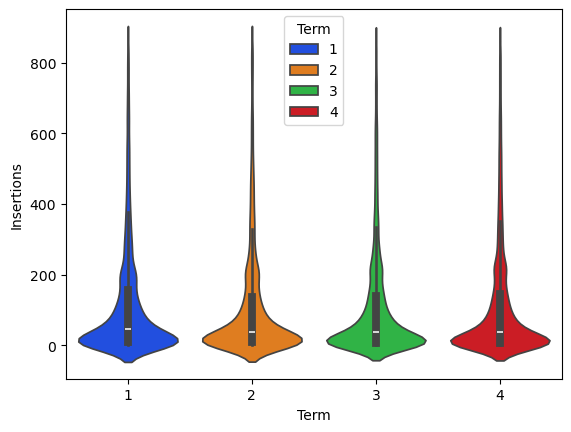

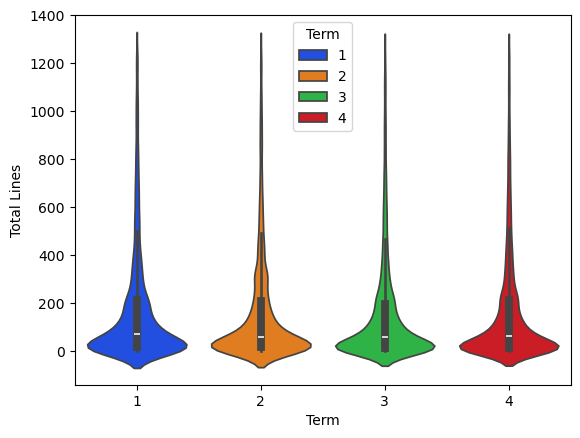

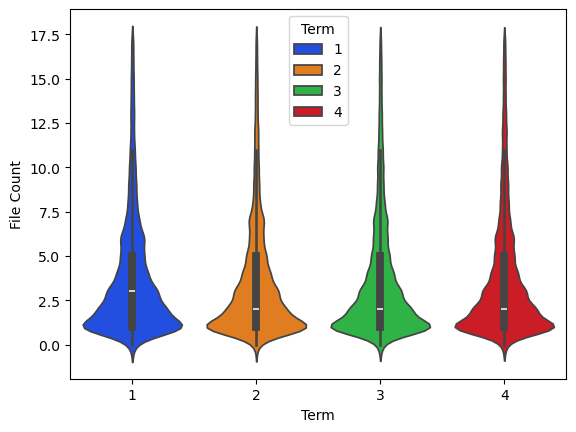

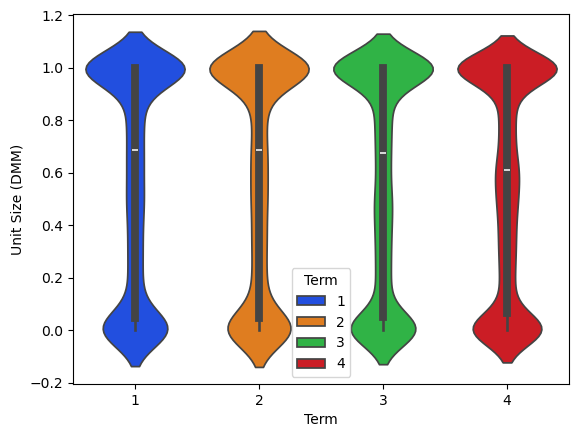

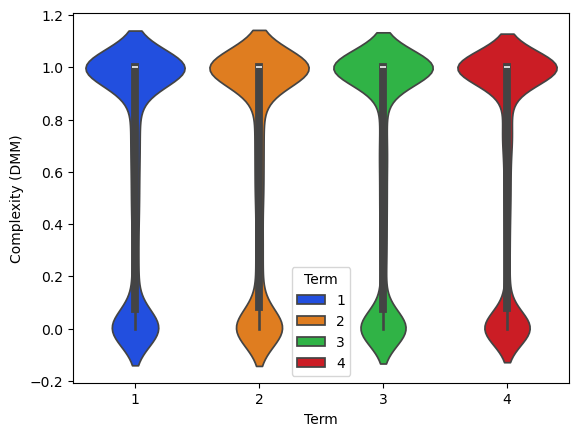

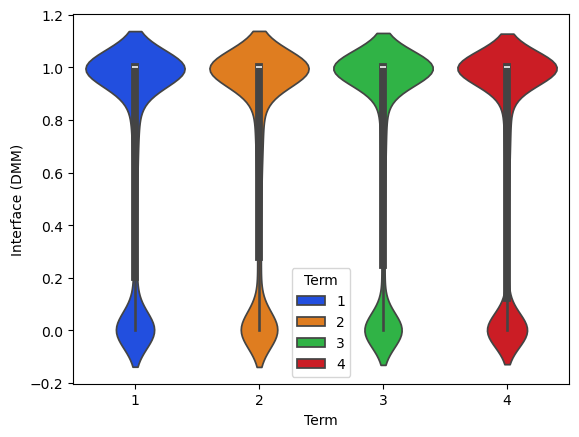

In [71]:
df_temp = dfc.copy()
for col in rel_col_c:    
    df_temp[col] = remove_outliers(df_temp, col, upperbound=0.8)[col]        
    fig, ax = plt.subplots()
    create_violinplot(dataframe=df_temp, column=col, axes=ax)

#### Test Violin Project Data

In [ ]:
filename = "cleaned_aggregated_metrics_v4_061025.csv"
dataset_path = tp.base_path + "output/" + filename
dataset_path
dfc = pd.read_csv(dataset_path)
dfc.shape

(672, 103)

In [80]:
rel_col_p = ['CC Sum', 'CC Sum 3folders', 'lines of code', 'lines of code tslike', 'lines of comments', 'lines of comments tslike']

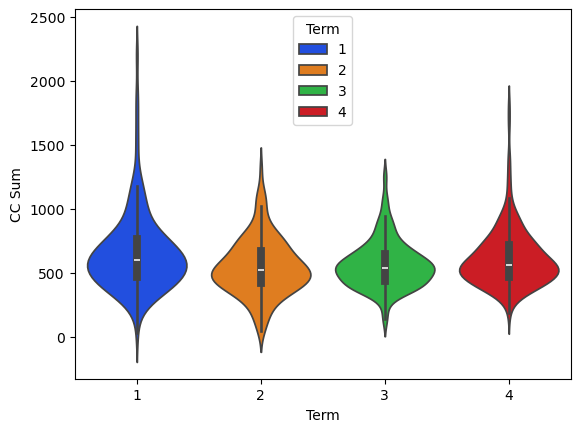

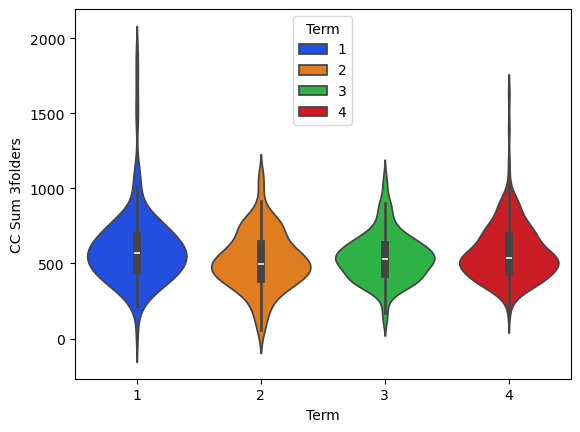

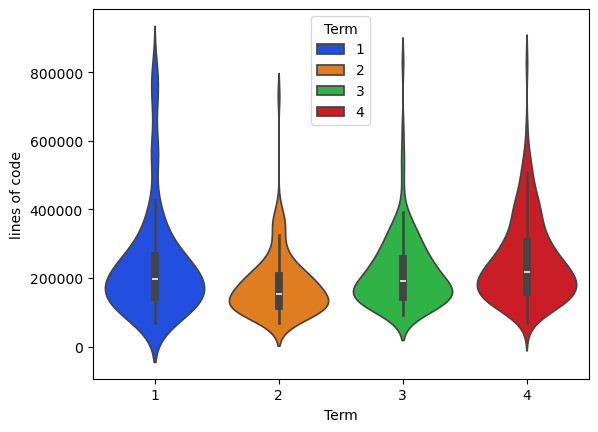

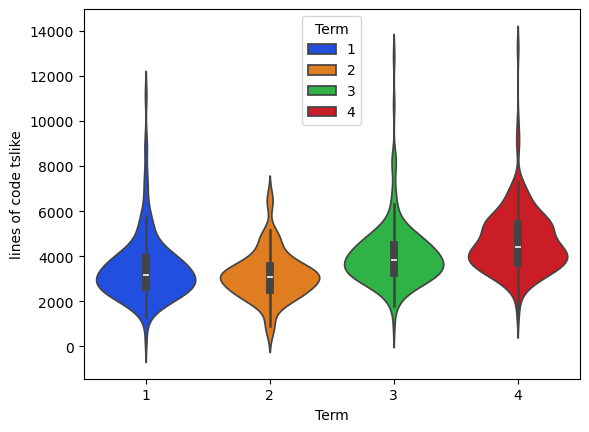

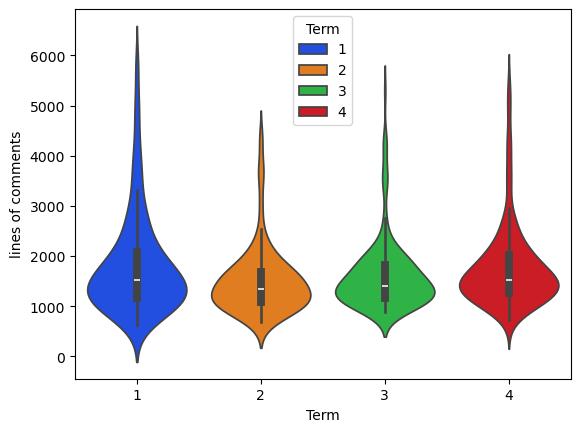

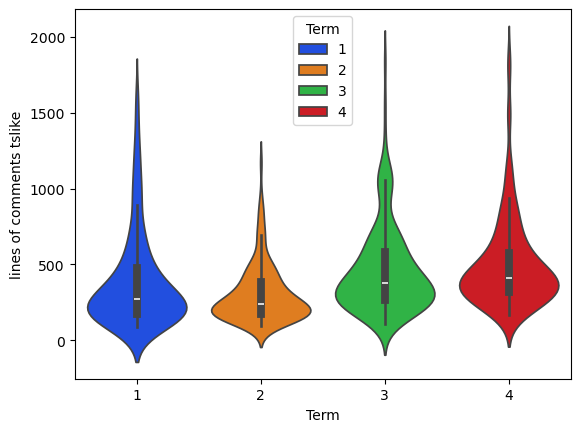

In [83]:
df_temp = dfp.copy()
# rename column 'term' to 'Term'
df_temp.rename(columns={'term': 'Term'}, inplace=True)
for col in rel_col_p:    
    df_temp[col] = remove_outliers(df_temp, col)[col]        
    fig, ax = plt.subplots()
    create_violinplot(dataframe=df_temp, column=col, ax=ax)

#### Test Scatter Commit data

In [13]:
df.dtypes

GenAI Period           bool
Term                  int64
Project               int64
Author Name          object
Author Email         object
Date                 object
Repository           object
Insertions            int64
Deletions             int64
Total Lines           int64
Files Changed         int64
Diff Lines            int64
File Count            int64
Unit Size (DMM)     float64
Complexity (DMM)    float64
Interface (DMM)     float64
Commit Hash          object
Merge Commit           bool
Default Branch         bool
dtype: object

In [37]:
rel_col = ['Insertions','Total Lines', 'Unit Size (DMM)', 'Complexity (DMM)', 'Interface (DMM)', 'File Count']

In [26]:
df[rel_col].describe()

Total Lines  Unit Size (DMM)  Complexity (DMM)  Interface (DMM)  \
count  8.648300e+04     41525.000000      41451.000000     41416.000000   
mean   6.552993e+03         0.570560          0.655285         0.701299   
std    2.776948e+05         0.418898          0.430783         0.423417   
min    0.000000e+00         0.000000          0.000000         0.000000   
25%    1.900000e+01         0.052632          0.076923         0.207462   
50%    8.700000e+01         0.661290          1.000000         1.000000   
75%    3.440000e+02         1.000000          1.000000         1.000000   
max    4.111259e+07         1.000000          1.000000         1.000000   

         File Count  
count  86483.000000  
mean      19.624944  
std      326.691313  
min        0.000000  
25%        1.000000  
50%        3.000000  
75%        6.000000  
max    24142.000000

In [31]:
# for relevant columns print 80 and 90 quantile
df[rel_col].quantile([0.8, 0.9, 0.95, 0.99, 1])

Total Lines  Unit Size (DMM)  Complexity (DMM)  Interface (DMM)  \
0.80        505.0              1.0               1.0              1.0   
0.90       2061.8              1.0               1.0              1.0   
0.95       8919.4              1.0               1.0              1.0   
0.99      53885.0              1.0               1.0              1.0   
1.00   41112591.0              1.0               1.0              1.0   

      File Count  
0.80         7.0  
0.90        14.0  
0.95        29.0  
0.99        83.0  
1.00     24142.0

In [30]:
# for relevant columns print 80 and 90 quantile
df[rel_col].quantile([0.8, 0.9, 0.95, 0.99, 0.999, 1])

Total Lines  Unit Size (DMM)  Complexity (DMM)  Interface (DMM)  \
0.800  5.050000e+02              1.0               1.0              1.0   
0.900  2.061800e+03              1.0               1.0              1.0   
0.950  8.919400e+03              1.0               1.0              1.0   
0.990  5.388500e+04              1.0               1.0              1.0   
0.999  7.850567e+05              1.0               1.0              1.0   
1.000  4.111259e+07              1.0               1.0              1.0   

       File Count  
0.800         7.0  
0.900        14.0  
0.950        29.0  
0.990        83.0  
0.999      5949.0  
1.000     24142.0

C:\Users\yanni\miniforge3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


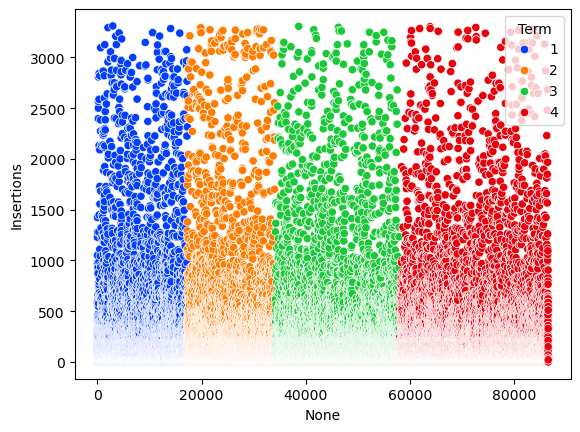

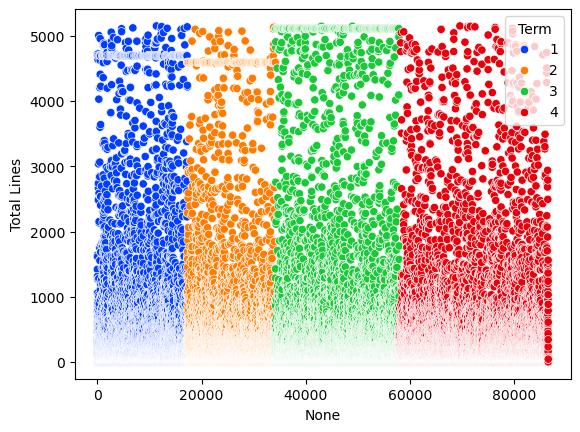

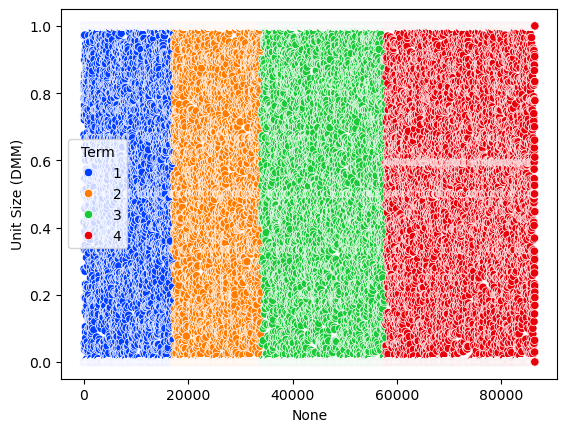

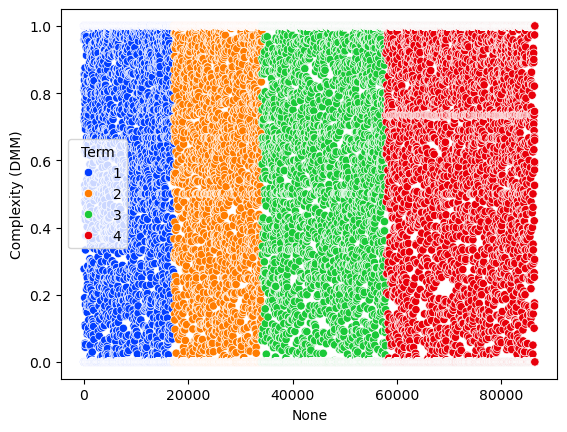

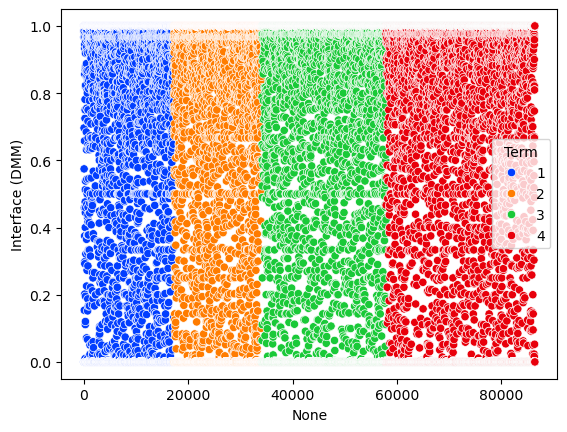

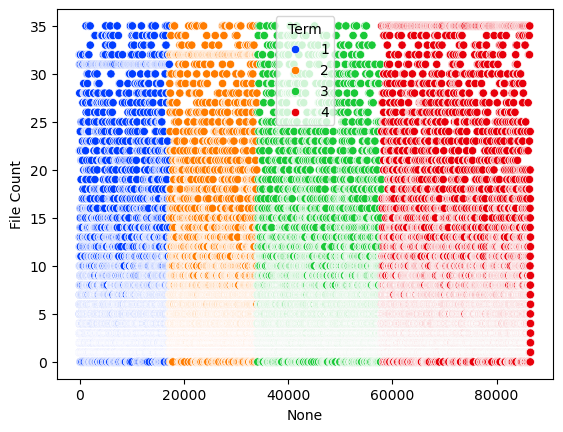

In [44]:
df_temp = df.copy()
for col in rel_col:    
    df_temp[col] = remove_outliers(df_temp, col)[col]        
    fig, ax = plt.subplots()
    create_scatterplot(dataframe=df_temp, column=col, axes=ax)

#### Test Scatter Project Data

In [45]:
filename = "cleaned_aggregated_metrics_v4_061025.csv"
dataset_path = tp.base_path + "output/" + filename
dataset_path
dfp = pd.read_csv(dataset_path)
dfp.shape

(672, 103)

In [46]:
dfp.columns.tolist()

['project index',
 'folder count',
 'file count',
 'file count tslike',
 'file count .ts',
 'file count .tsx',
 'file count .js',
 'file count .jsx',
 'commit count',
 'unique commit authors',
 'commit count per author',
 'first commit date',
 'last commit date',
 'lines of code',
 'lines of code tslike',
 'lines of code .ts',
 'lines of code .tsx',
 'lines of code .js',
 'lines of code .jsx',
 'lines of comments',
 'lines of comments tslike',
 'lines of comments .ts',
 'lines of comments .tsx',
 'lines of comments .js',
 'lines of comments .jsx',
 '/frontend .ts file_count',
 '/frontend .ts total_lines',
 '/frontend .ts sloc',
 '/frontend .ts total_lines_of_comments',
 '/frontend .ts blank_lines',
 '/frontend .js file_count',
 '/frontend .js total_lines',
 '/frontend .js sloc',
 '/frontend .js total_lines_of_comments',
 '/frontend .js blank_lines',
 '/src .ts file_count',
 '/src .ts total_lines',
 '/src .ts sloc',
 '/src .ts total_lines_of_comments',
 '/src .ts blank_lines',
 '/src .j

In [47]:
rel_col_p = ['CC Sum', 'CC Sum 3folders', 'lines of code', 'lines of code tslike', 'lines of comments', 'lines of comments tslike']

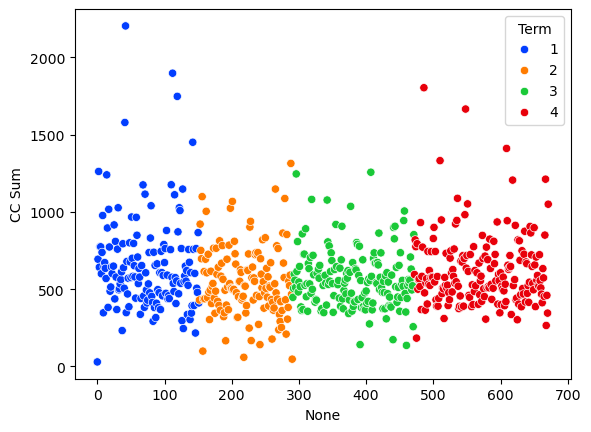

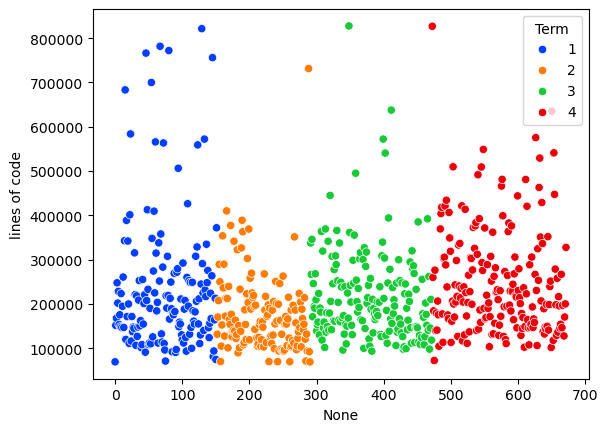

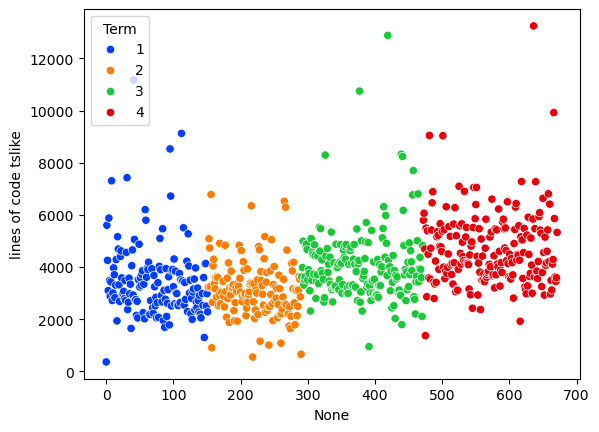

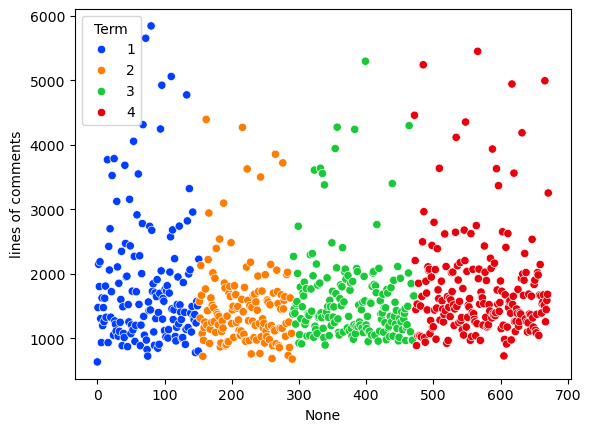

In [50]:
df_temp = dfp.copy()
# rename column 'term' to 'Term'
df_temp.rename(columns={'term': 'Term'}, inplace=True)
for col in rel_col_p:    
    df_temp[col] = remove_outliers(df_temp, col)[col]        
    fig, ax = plt.subplots()
    create_scatterplot(dataframe=df_temp, column=col, axes=ax)

### Plots creation, decision making

#### IQR (similar) vs Quantile - how to remove outliers

So either use just quantiles to remove outliers or use iqr (Interquartile range) which removes outliers based on quantile but also includes values that are close to this quantile by adding a buffer to it.
- wikipedia:
  - "In descriptive statistics, the interquartile range (IQR) is a measure of statistical dispersion, which is the spread of the data."

So actually i don't use iqr because that would be with 0.25 and 0.75 as bounds. But I use a custom of 0.95 which is the 95 percentile. So how do I call that how? do i describe that?

##### Variants of Outlier removal methods

In [ ]:

# upperbound = 0.75
# lowerbound = 0.25

# def remove_outliers(dataframe, column):
#     q1, q3 = dataframe[column].quantile([lowerbound, upperbound])
#     up_qunatile = dataframe[column].quantile(0.9)
#     range = q3 - q1
#     lower, upper = q1 - 1.5 * range, up_qunatile + 0.5 * range
#     df_no_outliers = dataframe[dataframe[column] <= upper]
#     return df_no_outliers

# def remove_outliers(dataframe, column):
#     q1, q3 = dataframe[column].quantile([0.25, 0.75])
#     iqr = q3 - q1
#     lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
#     df_no_outliers = dataframe[(dataframe[column] >= lower) & (dataframe[column] <= upper)]
#     return df_no_outliers

# def remove_outliers(dataframe, column, up_bound=0.99):
#     upper = dataframe[column].quantile(up_bound)
#     df_no_outliers = dataframe[dataframe[column] <= upper]
#     return df_no_outliers

##### Comparing those

In [40]:
def remove_outliers_q(dataframe, column):
    low_bound, up_bound = dataframe[column].quantile([lowerbound, upperbound])
    df_no_outliers = dataframe[(dataframe[column] >= low_bound) & (dataframe[column] <= up_bound)]
    return df_no_outliers

<Axes: xlabel='None', ylabel='Insertions'>

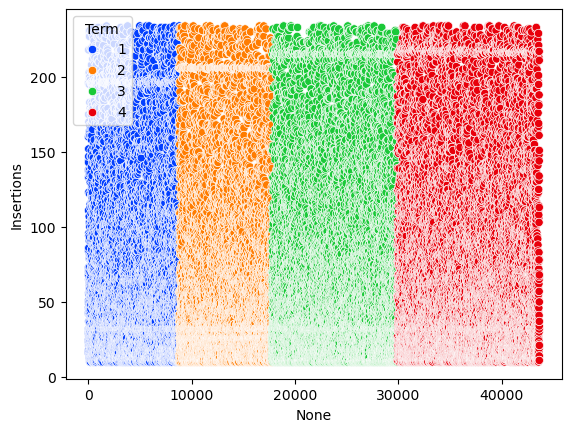

In [41]:
df_q_filtered = df.copy()
df_q_filtered = remove_outliers_q(df_q_filtered, 'Insertions')
create_scatterplot(dataframe=df_q_filtered, column='Insertions')

In [214]:
df_iqr_filtered = df.copy()
df_iqr_filtered = remove_outliers(df_iqr_filtered, 'Insertions')
create_scatterplot(dataframe=df_iqr_filtered, column='Insertions')

<Axes: xlabel='None', ylabel='Insertions'>

#### Rest

In [148]:
df.columns

Index(['GenAI Period', 'Term', 'Project', 'Author Name', 'Author Email',
       'Date', 'Repository', 'Insertions', 'Deletions', 'Total Lines',
       'Files Changed', 'Diff Lines', 'File Count', 'Unit Size (DMM)',
       'Complexity (DMM)', 'Interface (DMM)', 'Commit Hash', 'Merge Commit',
       'Default Branch'],
      dtype='object')

In [162]:
dff = df.copy()
dff['Insertions'] = np.log1p(df['Insertions'])
dff

GenAI Period  Term  Project  Author Name                 Author Email  \
0             False     1        0       classy             classy@cs.ubc.ca   
1             False     1        0      autobot   autobot@students.cs.ubc.ca   
2             False     1        0  UBC Student  braxtonh@students.cs.ubc.ca   
3             False     1        0  UBC Student  braxtonh@students.cs.ubc.ca   
4             False     1        0  UBC Student  braxtonh@students.cs.ubc.ca   
...             ...   ...      ...          ...                          ...   
86478          True     4      680  UBC Student    pdas05@students.cs.ubc.ca   
86479          True     4      680     pranjali    pranjalidas2201@gmail.com   
86480          True     4      680  UBC Student    pdas05@students.cs.ubc.ca   
86481          True     4      680     pranjali    pranjalidas2201@gmail.com   
86482          True     4      680  UBC Student    pdas05@students.cs.ubc.ca   

             Date       Repository  Insertions  Deletions  Total Lines  \
0      2021-09-21  project_team037    8.459988          0         4721   
1      2021-11-02  project_team037    5.283204          4          200   
2      2021-11-02  project_team037    5.283204          4          200   
3      2021-11-02  project_team037    5.081404        106          266   
4      2021-11-02  project_team037    0.693147         11           12   
...           ...              ...         ...        ...          ...   
86478  2024-11-22  project_team230    3.637586          8           45   
86479  2024-11-22  project_team230    0.000000          2            2   
86480  2024-11-22  project_team230    0.000000          2            2   
86481  2024-11-22  project_team230    3.091042         21           42   
86482  2024-11-22  project_team230    3.091042         21           42   

       Files Changed  Diff Lines  File Count  Unit Size (DMM)  \
0                 32        4721          32         1.000000   
1                  5         192           5         1.000000   
2                  5         192           5              NaN   
3                  1          54           1         1.000000   
4                  1         -10           1         1.000000   
...              ...         ...         ...              ...   
86478              6          29           6              NaN   
86479              1          -2           1              NaN   
86480              1          -2           1              NaN   
86481              3           0           3         0.777778   
86482              3           0           3              NaN   

       Complexity (DMM)  Interface (DMM)  \
0                   1.0         0.966667   
1                   1.0         1.000000   
2                   NaN              NaN   
3                   1.0         1.000000   
4                   1.0         1.000000   
...                 ...              ...   
86478               NaN              NaN   
86479               NaN              NaN   
86480               NaN              NaN   
86481               0.0         0.000000   
86482               NaN              NaN   

                                    Commit Hash  Merge Commit  Default Branch  
0      49d0208dc9f4ecf48db67dde068dafe858c3304a         False            True  
1      e5597a9a10f7e696bf56af19d7d96e472dbb8165         False            True  
2      9a0d1e70305b214dd001ad2df0a1e31a4a97d2d1          True            True  
3      9908a03edbada238182a1c6ce7210a24565f930a         False            True  
4      1ea8910dfec947436005bf479fac41125ecbe8d8         False            True  
...                                         ...           ...             ...  
86478  1fccdd6cdb06e3e96efd06ca188e7486dd3dea20          True            True  
86479  7fff628f4f292292719918172812245d42ccd8fa         False            True  
86480  d559a43dc0af8c9a768c505159a4f081935f2e65          True            True  
86481  78c544fbd2bb288dbd63ad942749408f2b4e3788

In [163]:
#
create_scatterplot(dataframe=dff, column='Insertions')

<Axes: xlabel='None', ylabel='Insertions'>

In [203]:
create_scatterplot(dataframe=dfr, column='Insertions')

<Axes: xlabel='None', ylabel='Insertions'>

<Axes: xlabel='None', ylabel='Insertions'>

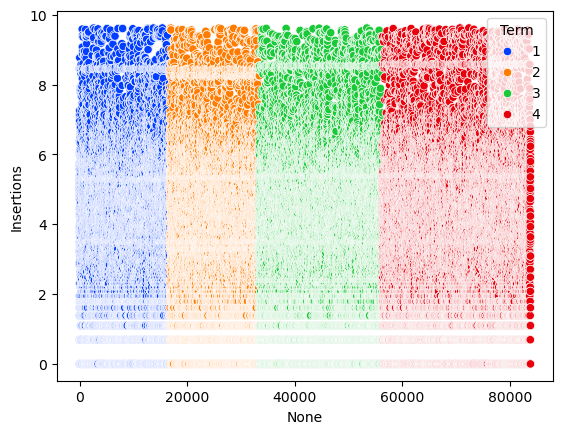

In [204]:
df_log = dfr.copy()
df_log['Insertions'] = np.log1p(dfr['Insertions'])
create_scatterplot(dataframe=df_log, column='Insertions')

In [201]:
dfr = remove_outliers(df, 'Insertions')

In [202]:
dfr.sort_values('Insertions', ascending=False).head(5)

GenAI Period  Term  Project   Author Name  \
74602          True     4      594    flora-hang   
72883          True     4      585   aradprsabet   
72880          True     4      585  Albert Chang   
72881          True     4      585   UBC Student   
15780         False     1      137    Tracy Chan   

                                        Author Email        Date  \
74602  147212289+flora-hang@users.noreply.github.com  2024-10-07   
72883                      aradpr@students.cs.ubc.ca  2024-09-28   
72880                        alb12345@student.ubc.ca  2024-09-27   
72881                      aradpr@students.cs.ubc.ca  2024-09-27   
15780                        tracysychan@outlook.com  2021-12-01   

            Repository  Insertions  Deletions  Total Lines  Files Changed  \
74602  project_team142       15135         78        15213             13   
72883  project_team133       15129         12        15141             37   
72880  project_team133       15129         12        15141             37   
72881  project_team133       15129         12        15141             37   
15780  project_team182       15128      14103        29231             26   

       Diff Lines  File Count  Unit Size (DMM)  Complexity (DMM)  \
74602       15057          13         0.000000          0.000000   
72883       15117          37              NaN               NaN   
72880       15117          37         1.000000          1.000000   
72881       15117          37              NaN               NaN   
15780        1025          26         0.785714          0.785714   

       Interface (DMM)                               Commit Hash  \
74602         0.000000  0880199bf38dcd97d5d83520efbf18ba440df663   
72883              NaN  11ed9a2e8bf4cd76586b57610a14d05bd608bfab   
72880         0.000000  272966dd3f3f13ea4fee2f96d29e75d3d514f9cc   
72881              NaN  b1b376ff64fc1fb49af6e34caded730fe03e2acb   
15780         0.785714  e2660f13b5bbe6165741d634e7c9546410bab81f   

       Merge Commit  Default Branch  
74602         False            True  
72883          True            True  
72880         False            True  
72881          True            True  
15780         False            True

In [196]:
df['Insertions'].describe()

count    8.648300e+04
mean     4.603629e+03
std      2.399966e+05
min      0.000000e+00
25%      1.000000e+01
50%      5.600000e+01
75%      2.340000e+02
max      4.111259e+07
Name: Insertions, dtype: float64

<Axes: xlabel='Insertions', ylabel='Density'>

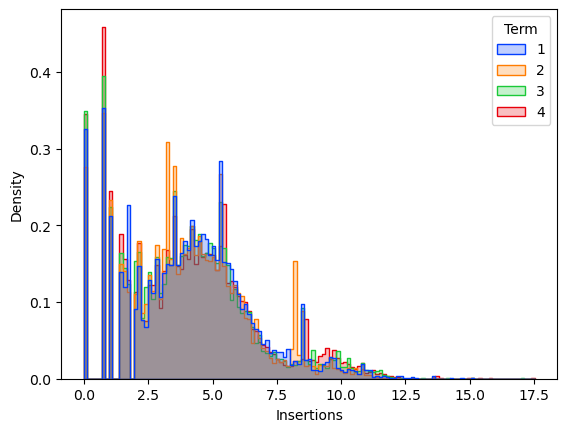

In [191]:
sns.histplot(data=dff, x='Insertions', hue='Term', element="step", stat="density", common_norm=False, palette=tp.TERM_COLORS)

In [62]:
print(tp.TERM_COLORS)
import seaborn as sns      # Advanced, prettier statistical plots (built on matplotlib).


['#023eff', '#ff7c00', '#1ac938', '#e8000b']


In [178]:
dfr = dfr.sort_values(['Term', 'Insertions'])

In [179]:
create_scatterplot(dataframe=dfr, column='Insertions')

<Axes: xlabel='None', ylabel='Insertions'>

In [165]:
create_violinplot(dataframe=dff, column='Insertions', x="Term")


<Axes: xlabel='Term', ylabel='Insertions'>

In [169]:
dfr = remove_outliers(df, 'Insertions')

<Axes: xlabel='Term', ylabel='Insertions'>

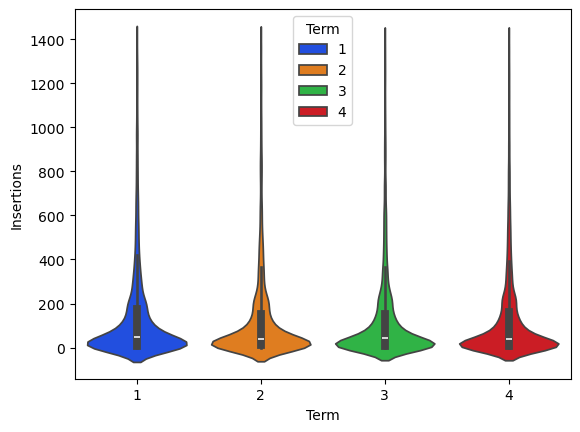

In [170]:
create_violinplot(dataframe=dfr, column='Insertions', x="Term")

<Axes: xlabel='Term', ylabel='Unit Size (DMM)'>

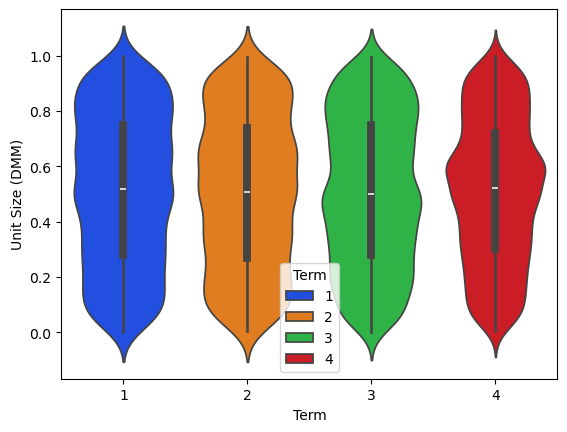

In [79]:
# if we plot 'Unit Size (DMM)' we only see 1 and 0 because they are the dominating values
df['Unit Size (DMM)'].describe()
# What if we remove all 1 and 0 values and plot again
df_no_zeros_ones = df[(df['Unit Size (DMM)'] != 0) & (df['Unit Size (DMM)'] != 1)]
create_violinplot(dataframe=df_no_zeros_ones, column='Unit Size (DMM)')
# now we can see clearer some differences, they seem minor

In [82]:
import matplotlib.pyplot as plt 

Creating violin plot for column: Project
Creating violin plot for column: Dev


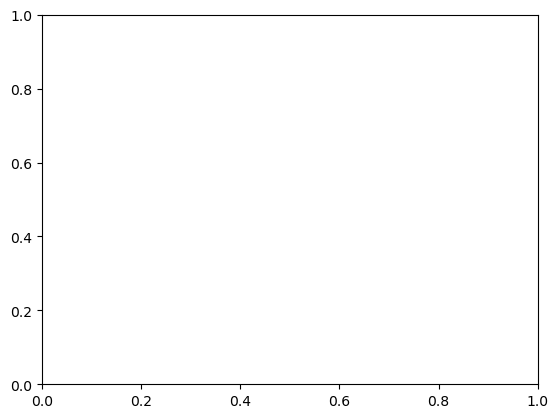

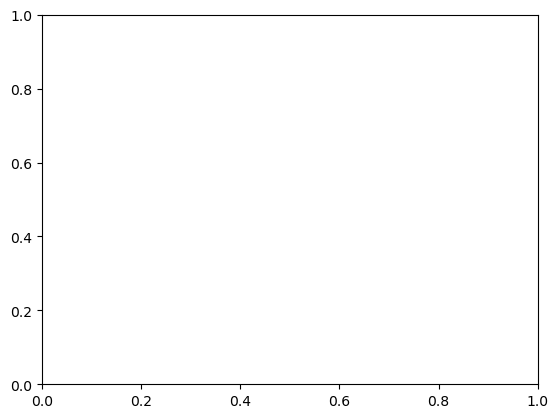

In [140]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        print(f"Creating violin plot for column: {col}")
        fig, ax = plt.subplots()
        # filter dataset to remove extreme outliers if necessary
        # df_n_o = remove_outliers(df, col)
        # create_violinplot(dataframe=df_n_o, column=col, axes=ax)

In [67]:
df['Unit Size (DMM)'].describe()

count    41525.000000
mean         0.570560
std          0.418898
min          0.000000
25%          0.052632
50%          0.661290
75%          1.000000
max          1.000000
Name: Unit Size (DMM), dtype: float64

In [68]:
df['Unit Size (DMM)'].value_counts()

Unit Size (DMM)
1.000000    15350
0.000000     9842
0.500000      446
0.666667      239
0.333333      231
            ...  
0.073394        1
0.931870        1
0.229508        1
0.056146        1
0.655113        1
Name: count, Length: 5888, dtype: int64

In [ ]:
df.columns.tolist()

['GenAI Period',
 'Term',
 'Project',
 'Author Name',
 'Author Email',
 'Date',
 'Repository',
 'Insertions',
 'Deletions',
 'Total Lines',
 'Files Changed',
 'Diff Lines',
 'File Count',
 'Unit Size (DMM)',
 'Complexity (DMM)',
 'Interface (DMM)',
 'Commit Hash',
 'Merge Commit',
 'Default Branch']

## Check quality of Dev Mapping

In [117]:

filename = "entwickler_zuordnung.csv"
dataset_path = tp.base_path + "output/interim_results/" + filename
dataset_path
df = pd.read_csv(dataset_path)
df.shape

(6056, 10)

In [ ]:
df.columns.tolist()

['Project',
 'Author Name',
 'Author Email',
 'Author ID',
 'Entwicklername',
 'Probability of Match',
 'is Bot',
 'Based on Merge',
 'Number of Candidates',
 'Details about Matching Algorithm']

In [ ]:
df.dtypes

Project                               int64
Author Name                          object
Author Email                         object
Author ID                            object
Entwicklername                       object
Probability of Match                float64
is Bot                                 bool
Based on Merge                         bool
Number of Candidates                  int64
Details about Matching Algorithm     object
dtype: object

In [ ]:
df.nunique()

Project                              681
Author Name                         1467
Author Email                        2720
Author ID                              8
Entwicklername                      2259
Probability of Match                   6
is Bot                                 2
Based on Merge                         2
Number of Candidates                   1
Details about Matching Algorithm       6
dtype: int64

In [ ]:
# Which values appear how often in each column
for col in df.columns:
    print(df[col].value_counts())

# distribution number of tuples per project (max 28, min 1)
# Check if results match with my data set?

# verify if all bots are really bots?

# Do 5 samples manually and compare against fuzzy data --> no tuples missing

Project
184    28
283    27
282    25
7      25
115    22
       ..
260     1
177     1
275     1
277     1
167     1
Name: count, Length: 681, dtype: int64
Author Name
UBC Student         1860
classy               481
autobot              275
CPSC 310 autobot     207
cs-310               198
                    ... 
stuffbyliang           1
Liang Liu              1
Hasan Altaf            1
Hasan                  1
rrashi                 1
Name: count, Length: 1467, dtype: int64
Author Email
classy@cs.ubc.ca                     481
autobot@students.cs.ubc.ca           469
310-bot@students.cs.ubc.ca           207
cs-310-noreply@students.cs.ubc.ca    198
ntrochtc@students.cs.ubc.ca            7
                                    ... 
jpitch01@students.cs.ubc.ca            1
cquiggaf@students.cs.ubc.ca            1
bdungate@students.cs.ubc.ca            1
rogerhuang257@gmail.com                1
vkang01@students.cs.ubc.ca             1
Name: count, Length: 2720, dtype: int64
Author ID
De

## Pydriller .commiter check

Does .commiter from pydriller show a more unique developer identifier

See prints in test.ipynb:
- .committer returns a developer object which consists of the two attributes email and name. Therefore it is identical to using the two attributes to identify an developer

## Manuell Mapping Check

In [125]:
filename = "dev_mapping_manually.csv"
# filename = "entwickler_zuordnung.csv"
dataset_path = tp.base_path + "output/interim_results/" + filename
dataset_path

'C:/Bibliothek/Career/UZH/BA BT Bachelor Arbeit Thesis/Code V3/output/interim_results/dev_mapping_manually.csv'

In [126]:
df = pd.read_csv(dataset_path)
df.shape

(3165, 4)

In [127]:
df.columns.tolist()

['Project', 'Author Name', 'Author Email', 'Dev']

In [139]:
df['Project'].nunique()

673

In [128]:
# How many tuples were assigned what number
df['Dev'].value_counts()

Dev
2.0    1517
1.0    1473
3.0     101
0.0      59
4.0      11
5.0       1
6.0       1
7.0       1
Name: count, dtype: int64

In [134]:
# How often each number was assigned to unique projects (673 as max)
unique_dev_proj = df[['Project', 'Dev']].drop_duplicates()
unique_dev_proj['Dev'].value_counts()

Dev
1.0    666
2.0    665
0.0     55
3.0     53
4.0      9
5.0      1
6.0      1
7.0      1
Name: count, dtype: int64

In [138]:
# How many projects have been assigned to dev 0 or dev > 2
# How many projects have not exactly two devs
proj = unique_dev_proj[(unique_dev_proj['Dev'] == 0) | (unique_dev_proj['Dev'] > 2)]
proj['Project'].nunique()

102

## Statistics Questions and Notes

1. Does it even make sense to check for significance of an attribute between two groups if I don't see a difference?
   1. Yes, it can still make sense to check for statistical significance even if you don't initially observe a difference between two groups. Statistical tests can help determine whether any observed differences are likely due to chance or represent a true effect.
   2. yes, you can (and often should) test for significance even if the plots look similar. Because...
      1. Statistical significance is not something your eyes can "see." It's something you must measure with a model that accounts for sample size, variance, and assumptions.
      2. Our eyes are bad at detecting small statistical differences
      3. shifts in the mean may not be perceptible in plots
      4. we see with quantitative measure  how likely the observed difference is due to random chance
2. When I transform the Input Column, do I also need to plot the column transformed?
   1. Sarah:no
3. No need to argue why i used what test

### Commit level test

In [205]:
filename = "commit_stats_all_terms_031125.csv"
dataset_path = tp.base_path + "output/" + filename
dataset_path
df = pd.read_csv(dataset_path)
df.shape

(86483, 19)

In [208]:
df.columns.tolist()

['GenAI Period',
 'Term',
 'Project',
 'Author Name',
 'Author Email',
 'Date',
 'Repository',
 'Insertions',
 'Deletions',
 'Total Lines',
 'Files Changed',
 'Diff Lines',
 'File Count',
 'Unit Size (DMM)',
 'Complexity (DMM)',
 'Interface (DMM)',
 'Commit Hash',
 'Merge Commit',
 'Default Branch']

In [209]:
dfc['GenAI Period'].value_counts()

GenAI Period
True     52324
False    34159
Name: count, dtype: int64

####  Deletions Mixed Effect Model

In [216]:
metric_col = 'Deletions'
repo_col = "Project"
period_col = "GenAI Period"     # values like False/True (bool or string)

dfc = df.copy()

# Keep only rows usable for the model
dfc = dfc.loc[
    dfc[period_col].notna()
    & dfc[metric_col].notna()
    & dfc[repo_col].notna()
].copy()

# Response: log(Insertions + 1)
dfc["log_metric"] = np.log1p(dfc[metric_col].astype(float))

# Make a clean categorical predictor with an explicit baseline:
# Handles both boolean True/False and string "True"/"False"
dfc["genai_period"] = dfc[period_col].astype(str)
dfc["genai_period"] = pd.Categorical(dfc["genai_period"], categories=["False", "True"])

# Mixed-effects model: random intercept per project
model = smf.mixedlm("log_metric ~ C(genai_period)", data=dfc, groups=dfc[repo_col])
fit = model.fit(reml=False, method="lbfgs")

print(fit.summary())

# Extract fixed effect: True vs False
param_name = "C(genai_period)[T.True]"
beta = float(fit.params[param_name])
se = float(fit.bse[param_name])
p = float(fit.pvalues[param_name])

ci = fit.conf_int().loc[param_name]
ci_low, ci_high = float(ci[0]), float(ci[1])

pct_change = (np.exp(beta) - 1) * 100
pct_ci_low = (np.exp(ci_low) - 1) * 100
pct_ci_high = (np.exp(ci_high) - 1) * 100

print("\nFixed effect: GenAI Period True vs False")
print(f"beta={beta:.6g}, SE={se:.6g}, p={p:.6g}")
print(f"95% CI (beta): [{ci_low:.6g}, {ci_high:.6g}]")
print(
    f"Approx % change in ({metric_col}+1): {pct_change:.3g}% "
    f"(95% CI [{pct_ci_low:.3g}%, {pct_ci_high:.3g}%])"
)

C:\Users\yanni\miniforge3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
C:\Users\yanni\miniforge3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
C:\Users\yanni\miniforge3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\yanni\miniforge3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
C:\Users\yanni\miniforge3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


                     Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        log_metric
No. Observations:          86483          Method:                    ML        
No. Groups:                681            Scale:                     3.8136    
Min. group size:           1              Log-Likelihood:            inf       
Max. group size:           349            Converged:                 Yes       
Mean group size:           127.0                                               
-------------------------------------------------------------------------------
                        Coef.   Std.Err.    z    P>|z|    [0.025       0.975]  
-------------------------------------------------------------------------------
Intercept                0.022 451352.279  0.000 1.000  -884634.189  884634.233
C(genai_period)[T.True] -0.455 647616.574 -0.000 1.000 -1269305.616 1269304.706
Group Var                0.000                               

C:\Users\yanni\AppData\Local\Temp\ipykernel_8248\319529687.py:39: RuntimeWarning: overflow encountered in exp
  pct_ci_high = (np.exp(ci_high) - 1) * 100


####  Total Lines Mixed Effect Model

In [215]:
metric_col = 'Total Lines'
repo_col = "Project"
period_col = "GenAI Period"     # values like False/True (bool or string)

dfc = df.copy()

# Keep only rows usable for the model
dfc = dfc.loc[
    dfc[period_col].notna()
    & dfc[metric_col].notna()
    & dfc[repo_col].notna()
].copy()

# Response: log(Insertions + 1)
dfc["log_metric"] = np.log1p(dfc[metric_col].astype(float))

# Make a clean categorical predictor with an explicit baseline:
# Handles both boolean True/False and string "True"/"False"
dfc["genai_period"] = dfc[period_col].astype(str)
dfc["genai_period"] = pd.Categorical(dfc["genai_period"], categories=["False", "True"])

# Mixed-effects model: random intercept per project
model = smf.mixedlm("log_metric ~ C(genai_period)", data=dfc, groups=dfc[repo_col])
fit = model.fit(reml=False, method="lbfgs")

print(fit.summary())

# Extract fixed effect: True vs False
param_name = "C(genai_period)[T.True]"
beta = float(fit.params[param_name])
se = float(fit.bse[param_name])
p = float(fit.pvalues[param_name])

ci = fit.conf_int().loc[param_name]
ci_low, ci_high = float(ci[0]), float(ci[1])

pct_change = (np.exp(beta) - 1) * 100
pct_ci_low = (np.exp(ci_low) - 1) * 100
pct_ci_high = (np.exp(ci_high) - 1) * 100

print("\nFixed effect: GenAI Period True vs False")
print(f"beta={beta:.6g}, SE={se:.6g}, p={p:.6g}")
print(f"95% CI (beta): [{ci_low:.6g}, {ci_high:.6g}]")
print(
    f"Approx % change in ({metric_col}+1): {pct_change:.3g}% "
    f"(95% CI [{pct_ci_low:.3g}%, {pct_ci_high:.3g}%])"
)

C:\Users\yanni\miniforge3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
C:\Users\yanni\miniforge3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
C:\Users\yanni\miniforge3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\yanni\miniforge3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
C:\Users\yanni\miniforge3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


                     Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        log_metric
No. Observations:          86483          Method:                    ML        
No. Groups:                681            Scale:                     5.2462    
Min. group size:           1              Log-Likelihood:            inf       
Max. group size:           349            Converged:                 Yes       
Mean group size:           127.0                                               
-------------------------------------------------------------------------------
                        Coef.   Std.Err.    z    P>|z|    [0.025       0.975]  
-------------------------------------------------------------------------------
Intercept               -0.089 529386.485 -0.000 1.000 -1037578.533 1037578.355
C(genai_period)[T.True] -0.676 759582.875 -0.000 1.000 -1488755.754 1488754.402
Group Var                0.000                               

C:\Users\yanni\AppData\Local\Temp\ipykernel_8248\1351668061.py:39: RuntimeWarning: overflow encountered in exp
  pct_ci_high = (np.exp(ci_high) - 1) * 100


#### Insertions Mixed Effets Model

In [ ]:
metric_col = "Insertions"
repo_col = "Project"
period_col = "GenAI Period"     # values like False/True (bool or string)

dfc = df.copy()

# Keep only rows usable for the model
dfc = dfc.loc[
    dfc[period_col].notna()
    & dfc[metric_col].notna()
    & dfc[repo_col].notna()
].copy()

# Response: log(Insertions + 1)
dfc["log_metric"] = np.log1p(dfc[metric_col].astype(float))

# Make a clean categorical predictor with an explicit baseline:
# Handles both boolean True/False and string "True"/"False"
dfc["genai_period"] = dfc[period_col].astype(str)
dfc["genai_period"] = pd.Categorical(dfc["genai_period"], categories=["False", "True"])

# Mixed-effects model: random intercept per project
model = smf.mixedlm("log_metric ~ C(genai_period)", data=dfc, groups=dfc[repo_col])
fit = model.fit(reml=False, method="lbfgs")

print(fit.summary())

# Extract fixed effect: True vs False
param_name = "C(genai_period)[T.True]"
beta = float(fit.params[param_name])
se = float(fit.bse[param_name])
p = float(fit.pvalues[param_name])

ci = fit.conf_int().loc[param_name]
ci_low, ci_high = float(ci[0]), float(ci[1])

pct_change = (np.exp(beta) - 1) * 100
pct_ci_low = (np.exp(ci_low) - 1) * 100
pct_ci_high = (np.exp(ci_high) - 1) * 100

print("\nFixed effect: GenAI Period True vs False")
print(f"beta={beta:.6g}, SE={se:.6g}, p={p:.6g}")
print(f"95% CI (beta): [{ci_low:.6g}, {ci_high:.6g}]")
print(
    f"Approx % change in ({metric_col}+1): {pct_change:.3g}% "
    f"(95% CI [{pct_ci_low:.3g}%, {pct_ci_high:.3g}%])"
)

C:\Users\yanni\miniforge3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


               Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   log_insertions
No. Observations:    86483     Method:               ML            
No. Groups:          681       Scale:                5.7341        
Min. group size:     1         Log-Likelihood:       -198758.0539  
Max. group size:     349       Converged:            Yes           
Mean group size:     127.0                                         
-------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                4.204    0.029 145.063 0.000  4.147  4.260
C(genai_period)[T.True] -0.011    0.038  -0.276 0.782 -0.085  0.064
Group Var                0.184    0.005                            


Fixed effect: GenAI Period True vs False
beta=-0.0105069, SE=0.0380436, p=0.782409
95% CI (beta): [-0.0850711, 0.0640572]
Approx 

### Project level test

In [191]:
filename = "cleaned_aggregated_metrics_v4_061025.csv"
dataset_path = tp.base_path + "output/" + filename
dataset_path
df = pd.read_csv(dataset_path)
df.shape

(672, 103)

In [203]:
df.columns.tolist()

#### CC Sum Welch t-test 

In [ ]:
metric = 'CC Sum 3folders'

dfp = df.copy()
dfp[dfp[metric].isna()] # empty --> all are numbers
dfp[metric].describe() # min 29, max 246_515 dtype: float64 -->  all valid
dfp[metric] = np.log1p(dfp[metric]) # transformation
dfp[dfp[metric].isna()] # empty --> all are numbers
dfp[metric].describe() # min 3.4, max 12. dtype: float64 -->  all valid

count    672.000000
mean       6.291297
std        0.493404
min        3.401197
25%        6.078211
50%        6.285998
75%        6.498658
max       12.415182
Name: CC Sum 3folders, dtype: float64

In [202]:
before = dfp[dfp.term.isin([1,2])][metric].to_numpy()
after  = dfp[dfp.term.isin([3,4])][metric].to_numpy()

res = stats.ttest_ind(before, after, equal_var=False, alternative="two-sided")

print(f"Welch t-test on {metric}")
print(f"n1={before.size}, n2={after.size}")
print(f"t={res.statistic:.6g}, p={res.pvalue:.6g}")

Welch t-test on CC Sum 3folders
n1=291, n2=381
t=-1.54306, p=0.123311


#### Code LoC Mann Whitney U test

In [167]:
df['lines of code'].describe()

count    6.720000e+02
mean     3.001287e+05
std      1.593893e+06
min      6.884700e+04
25%      1.428842e+05
50%      1.946380e+05
75%      2.687588e+05
max      4.123814e+07
Name: lines of code, dtype: float64

In [168]:
df['lines of code'].dtypes

dtype('int64')

In [169]:
# print not a number entries
df['lines of code'][df['lines of code'].isna()]

Series([], Name: lines of code, dtype: int64)

In [170]:
df.columns.tolist()

['project index',
 'folder count',
 'file count',
 'file count tslike',
 'file count .ts',
 'file count .tsx',
 'file count .js',
 'file count .jsx',
 'commit count',
 'unique commit authors',
 'commit count per author',
 'first commit date',
 'last commit date',
 'lines of code',
 'lines of code tslike',
 'lines of code .ts',
 'lines of code .tsx',
 'lines of code .js',
 'lines of code .jsx',
 'lines of comments',
 'lines of comments tslike',
 'lines of comments .ts',
 'lines of comments .tsx',
 'lines of comments .js',
 'lines of comments .jsx',
 '/frontend .ts file_count',
 '/frontend .ts total_lines',
 '/frontend .ts sloc',
 '/frontend .ts total_lines_of_comments',
 '/frontend .ts blank_lines',
 '/frontend .js file_count',
 '/frontend .js total_lines',
 '/frontend .js sloc',
 '/frontend .js total_lines_of_comments',
 '/frontend .js blank_lines',
 '/src .ts file_count',
 '/src .ts total_lines',
 '/src .ts sloc',
 '/src .ts total_lines_of_comments',
 '/src .ts blank_lines',
 '/src .j

In [171]:
list_of_nan = [
213,
295,
366,
376,
401,
426,
464,
492,
543,
660,
676,
348,
472,
129
]

In [172]:
df[df['project index'].isin(list_of_nan)][['project index', 'lines of code']]

project index  lines of code
128            129         244682
210            213         886023
287            295         951078
339            348          95655
357            366        1777245
367            376         945550
392            401         939968
417            426         929514
455            464        1183947
463            472         176078
483            492        1678675
534            543        2958611
651            660        1297140
667            676       41238144

In [173]:
df[df['lines of code'] > 800000]

project index  folder count  file count  file count tslike  \
129            130            37         172                 27   
210            213            42         108                 28   
287            295            42         124                 29   
348            357            51         214                 32   
357            366            71         438                 35   
367            376            42         311                 35   
392            401            42         135                 21   
417            426            43         289                 38   
455            464            47         194                 34   
472            481            45         256                 31   
483            492            39         300                 30   
534            543            39         258                 19   
651            660            48         289                 30   
667            676            45         260                 47   

     file count .ts  file count .tsx  file count .js  file count .jsx  \
129              16                0              11                0   
210              27                0               1                0   
287              23                0               6                0   
348              18                0              14                0   
357              20                0               2               13   
367              22               12               1                0   
392              19                0               2                0   
417              32                0               6                0   
455              17               15               2                0   
472              17                0              14                0   
483              19                0              11                0   
534              14                0               5                0   
651              22                6               2                0   
667              21                0              26                0   

     commit count  unique commit authors  ...  \
129           155                      5  ...   
210            79                      2  ...   
287           132                      5  ...   
348           153                      4  ...   
357           167                      3  ...   
367           117                      4  ...   
392           183                      4  ...   
417            64                      4  ...   
455           181                      4  ...   
472           292                      5  ...   
483           199                      3  ...   
534           142                      3  ...   
651            90                      5  ...   
667           112                      3  ...   

    TypeScript total_lines_of_comments TypeScript blank_lines  \
129                                463                    148   
210                                294                    384   
287                                578                    325   
348                                239                    203   
357                                276                    467   
367                                217                    366   
392                                355                    303   
417                                675                    319   
455                                364                    465   
472                                822                    658   
483                                823                    408   
534                                681                    383   
651                                444                    457   
667                                481                    248   

    JavaScript file_count  JavaScript total_lines  JavaScript sloc  \
129                    10                     621              526   
210                     0                       0  

In [174]:
df[['project index', 'lines of code']].sort_values('lines of code', ascending=False).head(15)

project index  lines of code
667            676       41238144
534            543        2958611
357            366        1777245
483            492        1678675
651            660        1297140
455            464        1183947
287            295         951078
367            376         945550
392            401         939968
417            426         929514
210            213         886023
348            357         827633
472            481         826861
129            130         821463
67              68         781616

In [175]:
df = df[df['lines of code'] < 800000]
df['lines of code'] = remove_outliers(df, 'lines of code')['lines of code']
df['lines of code'] = np.log1p(df['lines of code'])

In [176]:
df['lines of code'].describe()

count    658.000000
mean      12.186656
std        0.462153
min       11.139656
25%       11.861521
50%       12.157098
75%       12.478172
max       13.569120
Name: lines of code, dtype: float64

In [177]:
df[['lines of code', 'project index']][df['lines of code'].isna()]

Empty DataFrame
Columns: [lines of code, project index]
Index: []

In [ ]:



before = df[df.term.isin([1,2])]['lines of code']
after  = df[df.term.isin([3,4])]['lines of code']

# Welch t-test
tres = stats.ttest_ind(after, before, equal_var=False)

# Mann–Whitney U
ures = stats.mannwhitneyu(after, before, alternative="two-sided")

In [179]:
before

0      11.142543
1      11.927066
2      12.028954
3      12.419384
4      12.214532
         ...    
285    11.787515
286    11.442557
288    13.502574
289    11.428532
290    11.139656
Name: lines of code, Length: 288, dtype: float64

In [180]:
print(ures)

MannwhitneyuResult(statistic=np.float64(64327.0), pvalue=np.float64(4.961327664552719e-06))


## Whatever